In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import random
from copy import deepcopy

In [2]:
noise_scale = 100
number_of_samples = 50 
x = 25 *(np.random.rand(number_of_samples,1)-0.8)
y = 5*x + 20*x**2+1*x**3+noise_scale*np.random.randn(number_of_samples,1)

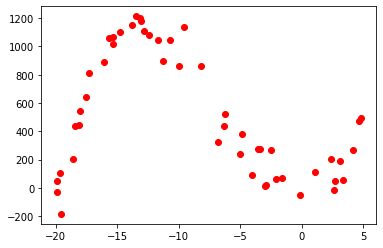

In [3]:
plt.plot(x,y,'ro')
plt.show()

In [4]:
x = np.array(x).flatten().tolist()
y = np.array(y).flatten().tolist()

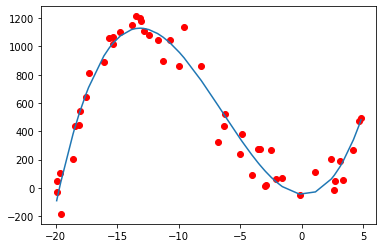

In [5]:
coeff = np.polyfit(x,y,3) 
poly = np.poly1d(coeff)

plt.plot(x,y, 'ro')
sortMe = np.sort(x) 

plt.plot(sortMe, poly(sortMe)) 
plt.show()

--- 

In [6]:
coeff

array([  0.99469363,  19.37869543,  -6.53312393, -46.39422901])

In [7]:
def createPopulation(size): 
    chromosomes = []
    for i in range(size): 
        chromosomes.append([random.randint(-50,50) for i in range(4)])
    return chromosomes 

In [8]:
def mutate(individual): 
    mutations = []
    mutations.append(individual)
    for _ in range(9): 
        new = deepcopy(individual)
        rand_idx = random.randrange(len(new))
        rand_num = new[rand_idx]
        rand_float = random.uniform(0.0,2.0)
        
        new_num = rand_num * rand_float
        new[rand_idx] = new_num
        
        mutations.append(new)
    return mutations

In [9]:
def cost(i, chromosome): 
    '''
    Returns the cost function of a chromosome 
    '''
    return chromosome[0]*(x[i]**3) + chromosome[1]*(x[i]**2) + chromosome[2]*(x[i])+ chromosome[3]


In [10]:
def fitness(chromosome): 
    badness = 0 
#     points = []
    for i in range(len(x)): 
        pred = cost(i, chromosome)
        yval = y[i]
        badness += (pred - yval)**2

    return (chromosome, round(badness))

In [11]:
fitness([-5, 25, -33, 40])

([-5, 25, -33, 40], 22790212896)

In [12]:
def fitnessPopulation(population): 
    bestGenes = []
    for i in range(len(population)): 
        individual = population[i]
        scores = fitness(individual)
        bestGenes.append(scores)
    bestGenes = sorted(bestGenes, key = lambda x: float(x[1]), reverse = False)[:10]
    return bestGenes 

In [13]:
def main(): 
    num_generations = 500
    bestGenes = []
    
    # create the starting population 
    population = createPopulation(100)

    # iterate through 500 generations 
    for i in range(num_generations): 
        print("Generation Number: " + str(i))
        new_population = []
        
        # find the top 10 best genes of the population to reproduce 
        bestGenes = fitnessPopulation(population)
        print("Best Genes for Generation\n" + str(bestGenes) + "\n")
        
        for k in range(len(bestGenes)): 
            
            # add mutations to the best genes 
            newGenes = mutate(bestGenes[k][0])
            
            # for each new child, add to new population 
            for j in newGenes: 
                new_population.append(j)
            
        # replace old population with new population 
        population = deepcopy(new_population)
        
        len(population)
    return population 

In [14]:
mostFit = main()

Generation Number: 0
Best Genes for Generation
[([1, 27, -27, -41], 138076234), ([2, 27, -7, -35], 185434153), ([2, 25, 22, -3], 332715539), ([-2, -16, -2, 36], 614398576), ([-4, -31, 25, -25], 2491291279), ([2, -1, 21, -7], 2782232777), ([-1, 27, 42, 34], 2885613943), ([0, -41, 22, -4], 3579574253), ([-5, -43, -17, -50], 3689291943), ([-3, -3, -44, -22], 4557020927)]

Generation Number: 1
Best Genes for Generation
[([2, 38.451185739164465, 22, -3], 12423534), ([1.0829018812289406, 25, 22, -3], 12629831), ([2, 35.27589257026724, -7, -35], 18139485), ([-0.5435744297751333, -3, -44, -22], 105531484), ([1.0568118306479137, 27, -27, -41], 109017810), ([2, 44.1097493291165, -7, -35], 110201763), ([1, 27, -13.907378313311108, -41], 114713864), ([1, 27, -27, -81.71147409458241], 133293776), ([1, 27, -27, -63.27708910616198], 135438767), ([1, 27, -27, -59.07877075726927], 135932026)]

Generation Number: 2
Best Genes for Generation
[([1.0829018812289406, 22.434553255936812, 22, -3], 836085), ([

Generation Number: 66
Best Genes for Generation
[([1.093364527599203, 22.27440490249199, 10.541922389237397, -80.77878494267378], 623593), ([1.093364527599203, 22.27440490249199, 10.405910971220026, -83.2044102072849], 623604), ([1.093364527599203, 22.27440490249199, 10.405910971220026, -83.29537261343889], 623613), ([1.093364527599203, 22.27440490249199, 10.453497489819387, -80.77878494267378], 623618), ([1.093364527599203, 22.27440490249199, 10.405910971220026, -79.68133998872933], 623901), ([1.093364527599203, 22.27440490249199, 10.541922389237397, -78.42720969877531], 623950), ([1.097952547634807, 22.348425302126437, 10.546066059948652, -80.81327655045105], 623994), ([1.093364527599203, 22.27440490249199, 10.405910971220026, -85.25930428326804], 624004), ([1.097952547634807, 22.348425302126437, 10.151111272207038, -82.71906368228747], 624015), ([1.097952547634807, 22.348425302126437, 10.546066059948652, -82.71906368228747], 624074)]

Generation Number: 67
Best Genes for Generation



Generation Number: 220
Best Genes for Generation
[([1.104482648492553, 22.188059146897558, 5.959930164072381, -84.56792286668596], 596975), ([1.104482648492553, 22.188059146897558, 5.830872583037401, -84.56792286668596], 597090), ([1.104482648492553, 22.188059146897558, 6.0944832001932046, -84.52327849254098], 597091), ([1.104482648492553, 22.188059146897558, 6.274485747054578, -84.52327849254098], 597623), ([1.104482648492553, 22.188059146897558, 6.274485747054578, -84.56792286668596], 597632), ([1.104482648492553, 22.188059146897558, 5.830872583037401, -82.23129854211166], 597782), ([1.104482648492553, 22.188059146897558, 6.274485747054578, -85.61682050333165], 597898), ([1.1047405217836348, 22.20369371098958, 5.9636430968614, -86.25706276749234], 597973), ([1.1047405217836348, 22.20369371098958, 5.953413300398817, -86.25706276749234], 597983), ([1.1047405217836348, 22.20369371098958, 6.128969797184056, -86.25706276749234], 598006)]

Generation Number: 221
Best Genes for Generation



Generation Number: 442
Best Genes for Generation
[([1.104482648492553, 22.148289394174576, 5.455395345786667, -85.82900969704411], 594575), ([1.104482648492553, 22.15463865447075, 5.378931054738065, -86.15416324177552], 594712), ([1.104482648492553, 22.159141605354673, 5.400354174182478, -86.14150747737628], 594983), ([1.104482648492553, 22.159141605354673, 5.386789747536941, -86.15416324177552], 594985), ([1.104482648492553, 22.159141605354673, 5.383824538060461, -86.15416324177552], 594986), ([1.104482648492553, 22.159141605354673, 5.428090737191147, -86.15416324177552], 594986), ([1.104482648492553, 22.159141605354673, 5.384703310548445, -86.15416324177552], 594986), ([1.104482648492553, 22.159141605354673, 5.384703310548445, -86.16889640455365], 594986), ([1.104482648492553, 22.159141605354673, 5.378931054738065, -86.15416324177552], 594988), ([1.104482648492553, 22.159141605354673, 5.455395345786667, -85.58262853358943], 594988)]

Generation Number: 443
Best Genes for Generation


Best Genes for Generation
[([1.104482648492553, 22.13531781767432, 5.131020982404985, -85.2417714056481], 593569), ([1.104482648492553, 22.13531781767432, 4.913678433479963, -87.32368629408039], 593594), ([1.104482648492553, 22.13531781767432, 5.006590945222437, -87.32368629408039], 593597), ([1.104482648492553, 22.13531781767432, 5.131020982404985, -84.22618426680341], 593622), ([1.104482648492553, 22.13531781767432, 4.913678433479963, -87.9215452511741], 593624), ([1.104482648492553, 22.13531781767432, 5.103353500890828, -87.32368629408039], 593724), ([1.104482648492553, 22.138751766518606, 5.025842371517409, -86.8384523124563], 593758), ([1.104482648492553, 22.138751766518606, 5.191045999932527, -84.98962216540026], 593773), ([1.104482648492553, 22.138751766518606, 5.075111044332674, -87.24459964063877], 593798), ([1.104482648492553, 22.138751766518606, 4.917416486181243, -87.24459964063877], 593841)]

Generation Number: 488
Best Genes for Generation
[([1.104482648492553, 22.1353178

In [15]:
coeff = fitnessPopulation(mostFit)[0][0]

In [16]:
coeff

[1.104482648492553, 22.13531781767432, 5.103353500890828, -85.56994582622573]

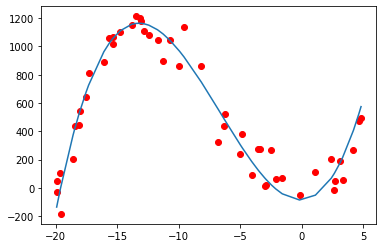

In [17]:
poly = np.poly1d(coeff)
plt.plot(x,y, 'ro')
sortMe = np.sort(x) 

plt.plot(sortMe, poly(sortMe)) 
plt.show()